In [6]:
root_folder = '/Volumes/My Book Thunderbolt Duo/IPTS/BraggEdge/SNAP/SNAP_August_September_2015/'

In [7]:
temperature_file = 'Vacuum_Furnace.txt'
full_temperature_file = root_folder + temperature_file

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
my_header = [None, "furnace vacuum2", None, "furnace vacuum1", None, "tolerance",
            None, "%power", None, "OT Temp", None, "Ramp SP", None,
            "OT SP", None, "Setpoint", None, "Sample", None]
df = pd.read_csv(full_temperature_file, sep='\t', names=my_header, )
df = df.reset_index()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12987 entries, 0 to 12986
Data columns (total 20 columns):
index              12987 non-null object
None               0 non-null float64
furnace vacuum2    12987 non-null float64
None               0 non-null float64
furnace vacuum1    12987 non-null float64
None               0 non-null float64
tolerance          12987 non-null float64
None               0 non-null float64
%power             12987 non-null float64
None               0 non-null float64
OT Temp            12987 non-null float64
None               0 non-null float64
Ramp SP            12987 non-null float64
None               0 non-null float64
OT SP              12987 non-null float64
None               0 non-null float64
Setpoint           12987 non-null float64
None               0 non-null float64
Sample             12987 non-null float64
None               0 non-null float64
dtypes: float64(19), object(1)
memory usage: 2.0+ MB


In [11]:
df.head()

,index,None,furnace vacuum2,None,furnace vacuum1,None,tolerance,None,%power,None,OT Temp,None,Ramp SP,None,OT SP,None,Setpoint,None,Sample,None
0,9/2/2015 4:17:22 PM,NaN,0.0,NaN,0.0,NaN,10.0,NaN,0.0,NaN,22.0,NaN,500.0,NaN,1450.0,NaN,0.0,NaN,20.0,NaN
1,9/2/2015 4:17:44 PM,NaN,0.0,NaN,0.0,NaN,10.0,NaN,0.0,NaN,22.0,NaN,500.0,NaN,1450.0,NaN,0.0,NaN,20.0,NaN
2,9/2/2015 4:18:06 PM,NaN,0.0,NaN,0.0,NaN,10.0,NaN,0.0,NaN,22.0,NaN,500.0,NaN,1450.0,NaN,500.0,NaN,20.0,NaN
3,9/2/2015 4:18:27 PM,NaN,0.0,NaN,0.0,NaN,10.0,NaN,0.0,NaN,22.0,NaN,500.0,NaN,1450.0,NaN,500.0,NaN,20.0,NaN
4,9/2/2015 4:18:49 PM,NaN,0.0,NaN,0.0,NaN,10.0,NaN,0.0,NaN,22.0,NaN,500.0,NaN,1450.0,NaN,500.0,NaN,20.0,NaN


In [13]:
try:
    del df[None] #removing empty columns
except:
    pass

In [14]:
df.head()

,index,furnace vacuum2,furnace vacuum1,tolerance,%power,OT Temp,Ramp SP,OT SP,Setpoint,Sample
0,9/2/2015 4:17:22 PM,0.0,0.0,10.0,0.0,22.0,500.0,1450.0,0.0,20.0
1,9/2/2015 4:17:44 PM,0.0,0.0,10.0,0.0,22.0,500.0,1450.0,0.0,20.0
2,9/2/2015 4:18:06 PM,0.0,0.0,10.0,0.0,22.0,500.0,1450.0,500.0,20.0
3,9/2/2015 4:18:27 PM,0.0,0.0,10.0,0.0,22.0,500.0,1450.0,500.0,20.0
4,9/2/2015 4:18:49 PM,0.0,0.0,10.0,0.0,22.0,500.0,1450.0,500.0,20.0


In [15]:
# removing useless columns
new_df = df.drop(df.columns[[1,2,3,4,6,7,8,9]], axis=1)
new_df.head()

,index,OT Temp
0,9/2/2015 4:17:22 PM,22.0
1,9/2/2015 4:17:44 PM,22.0
2,9/2/2015 4:18:06 PM,22.0
3,9/2/2015 4:18:27 PM,22.0
4,9/2/2015 4:18:49 PM,22.0


<IPython.core.display.Javascript object>


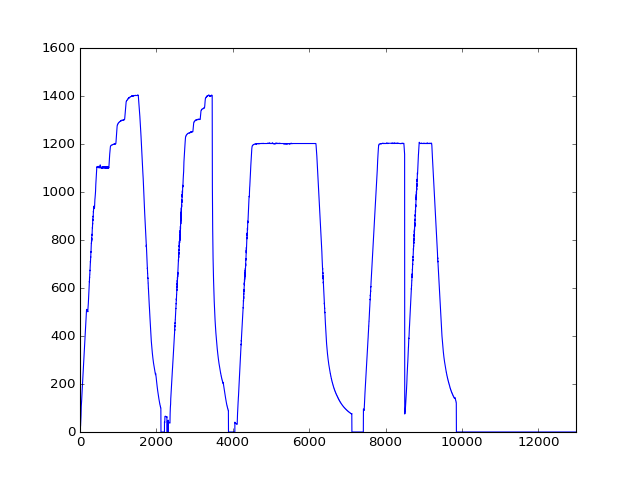

In [11]:
fig = plt.figure()
df['OT Temp'].plot()

### convert to pandas time format 

In [16]:
new_df['index'] = pd.to_datetime(new_df['index'])

In [17]:
new_df.head()

,index,OT Temp
0,2015-09-02 16:17:22,22.0
1,2015-09-02 16:17:44,22.0
2,2015-09-02 16:18:06,22.0
3,2015-09-02 16:18:27,22.0
4,2015-09-02 16:18:49,22.0


### convert to time stamp 

In [18]:
import time
import datetime

In [19]:
def conv(x):
    return time.mktime(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").timetuple())

In [20]:
new_df['index'] = new_df['index'].apply(conv)

In [21]:
new_df.head()

,index,OT Temp
0,1.441225e+09,22.0
1,1.441225e+09,22.0
2,1.441225e+09,22.0
3,1.441225e+09,22.0
4,1.441225e+09,22.0


## Output the temperature spectrum 

In [29]:
new_df = new_df.set_index('index')

In [30]:
output_file = root_folder + 'temperature_spectrum.csv'
new_df.to_csv(output_file, header=False)

## Display Temperature vs time 

<IPython.core.display.Javascript object>


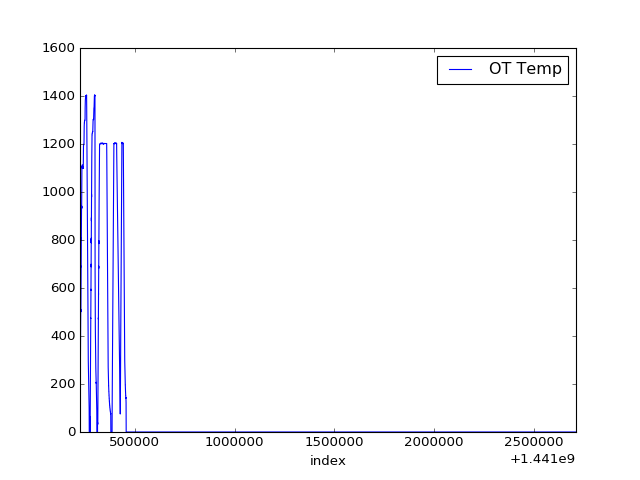

In [27]:
new_df.plot(x='index', y='OT Temp')